***
***
## 0. Setup

In [1]:
# Load the autoreload extension
%load_ext autoreload

# Enable autoreloading for all modules
%autoreload 2

# Import local modules
from util_core import *
import olympic_medals.util_olympic_medals as U


***
***
## 1. Data load

In [2]:
# Base loads
all_data = U.load_base_datasets()

medal_df = all_data["medal_df"]
event_df = all_data["event_df"]
team_df = all_data["team_df"]
athlete_df = all_data["athlete_df"]

# Combined entry data
entry_df = U.build_combined_event_entries(team_df, athlete_df)


Notice: Dropped 358/1698 (21.1%) non-current team records.
null_df: 0
Notice: Dropped 3/11113 (0.0%) non-current team records.
Exploded to 14978 records, one per athlete per event entered.
Notice: Dropped 435/14978 (2.9%) invalid event records.
Notice: Dropped 6494/14543 (44.7%) team event records.


#### 1.1 Medals

In [3]:
# Side quest - how many medals were awarded in each event?
count_df = medal_df["event_key"].value_counts().to_frame().reset_index()

# Print summary stats
total_e = len(count_df)
gt3 = len(count_df[count_df["count"]>3])
eq3 = len(count_df[count_df["count"]==3])
lt3 = len(count_df[count_df["count"]<3])
print(f"Isolated a total of {total_e} events awarding {len(medal_df)} cummulative medals...")
print(f"{gt3} ({gt3/total_e*100:.1f}%) events awarded 4+ medals")
print(f"{eq3} ({eq3/total_e*100:.1f}%) events awarded 3 medals")
print(f"{lt3} ({lt3/total_e*100:.1f}%) events awarded <3 medals")

# Look at 57 events with 4+ medals
gt3_df = count_df[count_df["count"]>3].copy()
gt3_df["discipline"] = gt3_df["event_key"].apply(lambda x: x.split(": ")[0])
print(gt3_df["discipline"].value_counts())

# View sample
medal_df.head()


Isolated a total of 329 events awarding 1044 cummulative medals...
57 (17.3%) events awarded 4+ medals
272 (82.7%) events awarded 3 medals
0 (0.0%) events awarded <3 medals
discipline
Wrestling              18
Judo                   15
Boxing                 13
Taekwondo               8
Athletics               1
Canoe Sprint            1
Artistic Gymnastics     1
Name: count, dtype: int64


,medal_type,medal_code,medal_date,name,gender,discipline,event,event_type,url_event,code,country_code,country,country_long,event_key
0,Gold Medal,1.0,2024-07-27,Remco EVENEPOEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136,BEL,Belgium,Belgium,Cycling Road: Men's Individual Time Trial
1,Silver Medal,2.0,2024-07-27,Filippo GANNA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,ITA,Italy,Italy,Cycling Road: Men's Individual Time Trial
2,Bronze Medal,3.0,2024-07-27,Wout van AERT,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147,BEL,Belgium,Belgium,Cycling Road: Men's Individual Time Trial
3,Gold Medal,1.0,2024-07-27,Grace BROWN,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173,AUS,Australia,Australia,Cycling Road: Women's Individual Time Trial
4,Silver Medal,2.0,2024-07-27,Anna HENDERSON,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525,GBR,Great Britain,Great Britain,Cycling Road: Women's Individual Time Trial


#### 1.2 Events

In [4]:
# Print summary stats and view sample
total_e2 = len(event_df)
assert total_e2 == total_e, f"Warning total_e: {total_e}, total_e2: {total_e2}"
print(f"Isolated a total of {total_e2} events...")
event_df.head()


Isolated a total of 329 events...


,event,tag,sport,sport_code,sport_url,event_key
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,Archery: Men's Individual
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,Archery: Women's Individual
2,Men's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,Archery: Men's Team
3,Women's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,Archery: Women's Team
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,Archery: Mixed Team


#### 1.3 Teams

In [5]:
# View sample
team_df.head()


,code,current,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches,event_key
0,ARCMTEAM3---CHN01,True,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN,Archery: Men's Team
1,ARCMTEAM3---COL01,True,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN,Archery: Men's Team
2,ARCMTEAM3---FRA01,True,France,M,FRA,France,France,Archery,ARC,Men's Team,"['ADDIS Baptiste', 'CHIRAULT Thomas', 'VALLADO...",NaN,"['1541270', '1541272', '1541275']",3.0,NaN,NaN,Archery: Men's Team
3,ARCMTEAM3---GBR01,True,Great Britain,M,GBR,Great Britain,Great Britain,Archery,ARC,Men's Team,"['HALL Conor', 'HALL Tom', 'WISE Alex']",NaN,"['1560988', '1560989', '1561003']",3.0,NaN,NaN,Archery: Men's Team
4,ARCMTEAM3---IND01,True,India,M,IND,India,India,Archery,ARC,Men's Team,"['BOMMADEVARA Dhiraj', 'JADHAV Pravin Ramesh',...",NaN,"['1546108', '1546112', '1546110']",3.0,NaN,NaN,Archery: Men's Team


#### 1.4 Athletes

In [6]:
# View sample
athlete_df.head()


,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports,event_key
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN,Wrestling: Men's Greco-Roman 97kg
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,...,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN,Wrestling: Men's Greco-Roman 77kg
2,1532874,True,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,...,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wrestling: Men's Greco-Roman 67kg
3,1532944,True,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,...,Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN,Wrestling: Men's Freestyle 57kg
4,1532945,True,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN,Wrestling: Men's Freestyle 65kg


#### 1.5 Combined entries

In [7]:
# View sample
entry_df.head()


,event_key,gender,country_code,country
0,Archery: Men's Team,M,CHN,China
1,Archery: Men's Team,M,COL,Colombia
2,Archery: Men's Team,M,FRA,France
3,Archery: Men's Team,M,GBR,Great Britain
4,Archery: Men's Team,M,IND,India


***
***
## 2. Medal rates

In [8]:
# Now...we can count entries by country and medals by country

# Entries
country_entry_df = entry_df["country"].value_counts().to_frame().reset_index().rename(columns={"count":"entries"})

# Medals
country_medal_df = medal_df["country"].value_counts().to_frame().reset_index().rename(columns={"count":"total_medals"})
country_medal_detail_df = medal_df[["country", "medal_type"]].value_counts().to_frame().reset_index().rename(columns={"count":"medals"})
country_medal_detail_df = pd.pivot_table(country_medal_detail_df, index="country", columns="medal_type", values="medals")
country_medal_detail_df.columns = ["_".join(x.lower().split(" "))+"s" for x in country_medal_detail_df.columns]
detail_cols = ["gold_medals", "silver_medals", "bronze_medals"]
country_medal_df = pd.merge(country_medal_df, country_medal_detail_df[detail_cols].reset_index(), how="left", on="country")
country_medal_df[detail_cols] = country_medal_df[detail_cols].fillna(0).astype(int)

# Validate medal details
country_medal_df["checksum"] = country_medal_df[detail_cols].sum(axis=1)
country_medal_df["checksum_match"] = country_medal_df["checksum"] == country_medal_df["total_medals"]
assert country_medal_df["checksum_match"].sum() == len(country_medal_df)
country_medal_df.drop(columns=["checksum", "checksum_match"], inplace=True)

# Join
country_df = pd.merge(country_entry_df, country_medal_df, how="left", on="country")
country_df[["total_medals"]+detail_cols] = country_df[["total_medals"]+detail_cols].fillna(0).astype(int)

# Unweighted medal rate
country_df["medal_rate_unweighted"] = country_df["total_medals"] / country_df["entries"]

# Weighted medal rate
def calc_weighted_medal_rate(x, weights=[2, 1.5, 1]):
    gold_sum = x["gold_medals"] * weights[0]
    silver_sum = x["silver_medals"] * weights[1]
    bronze_sum = x["bronze_medals"] * weights[2]
    rate = (gold_sum + silver_sum + bronze_sum) / x["entries"]
    return rate
country_df["medal_rate_weighted"] = country_df.apply(lambda x: calc_weighted_medal_rate(x), axis=1)

# Add ranks and sort
country_df["medal_rate_unweighted_rank"] = country_df["medal_rate_unweighted"].rank(method="min", ascending=False)
country_df["medal_rate_weighted_rank"] = country_df["medal_rate_weighted"].rank(method="min", ascending=False)
country_df = country_df.sort_values(["medal_rate_weighted_rank", "medal_rate_unweighted_rank"]).reset_index(drop=True)

# Export and view sample
country_df.to_csv(f"out/country_medal_rankings.csv", index=False)
country_df


,country,entries,total_medals,gold_medals,silver_medals,bronze_medals,medal_rate_unweighted,medal_rate_weighted,medal_rate_unweighted_rank,medal_rate_weighted_rank
0,Saint Lucia,5,2,1,1,0,0.400000,0.700000,1.0,1.0
1,Dominica,4,1,1,0,0,0.250000,0.500000,9.0,2.0
2,DPR Korea,15,6,0,2,4,0.400000,0.466667,1.0,3.0
3,IR Iran,41,12,3,6,3,0.292683,0.439024,5.0,4.0
4,Bahrain,15,4,2,1,1,0.266667,0.433333,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...
201,Solomon Islands,2,0,0,0,0,0.000000,0.000000,93.0,93.0
202,Liechtenstein,1,0,0,0,0,0.000000,0.000000,93.0,93.0
203,Somalia,1,0,0,0,0,0.000000,0.000000,93.0,93.0
204,Belize,1,0,0,0,0,0.000000,0.000000,93.0,93.0


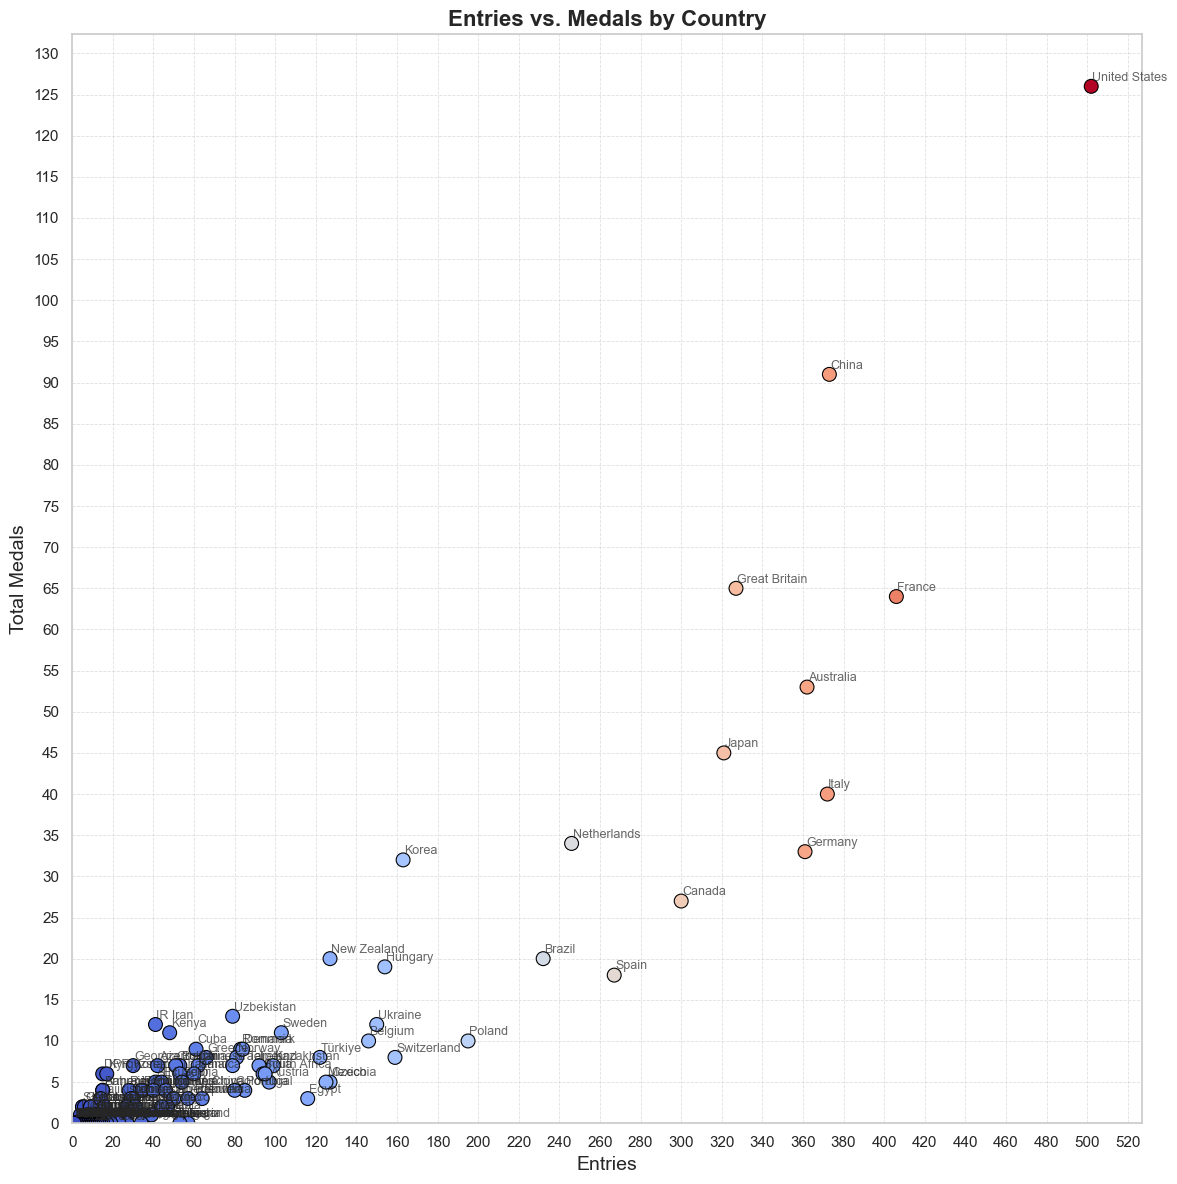

In [22]:
# Copy data
data = country_df.copy()

# Set up Seaborn's style and a color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)  # Use a colormap that spans a spectrum

# Create the plot
plt.figure(figsize=(12, 12))

# Scatter plot with varied colors using 'entries' to define the color spectrum
scatter_plot = sns.scatterplot(x='entries', y='total_medals', data=data, 
                               hue='entries', palette=palette, s=100, edgecolor='black', legend=None)

# Add titles and labels
plt.title('Entries vs. Medals by Country', fontsize=16, weight='bold')
plt.xlabel('Entries', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)

# Set x and y axis limits to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Label each point with the country name, with more spacing from the points
for i in range(data.shape[0]):
    plt.text(data['entries'][i] + 0.5, data['total_medals'][i] + 0.7, 
             data['country'][i], fontsize=9, alpha=0.7)

# Set major ticks for both axes
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))   # Major ticks every 5 entries
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))  # Major ticks every 10%

# Enable gridlines for major ticks only
plt.grid(True, which='major', linestyle='--', linewidth=0.6, alpha=0.6)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

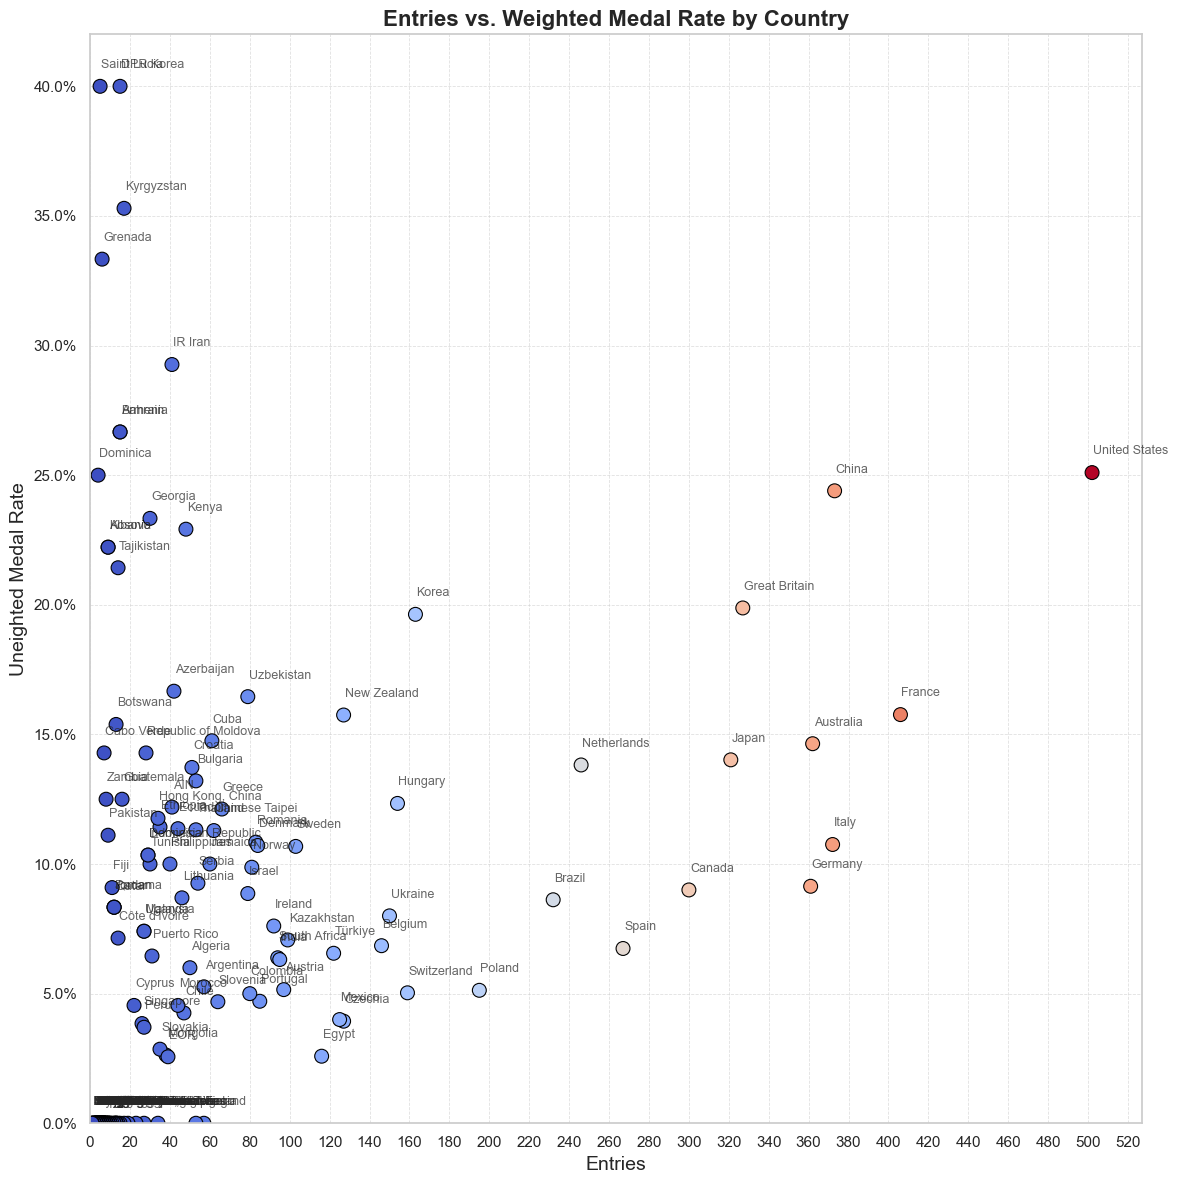

In [23]:
# Copy data
data = country_df.copy()

# Multiply 'medal_rate_weighted' by 100 for percentage display
data['medal_rate_unweighted_percentage'] = data['medal_rate_unweighted'] * 100

# Set up Seaborn's style and a color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)  # Use a colormap that spans a spectrum

# Create the plot
plt.figure(figsize=(12, 12))

# Scatter plot with varied colors using 'entries' to define the color spectrum
scatter_plot = sns.scatterplot(x='entries', y='medal_rate_unweighted_percentage', data=data, 
                               hue='entries', palette=palette, s=100, edgecolor='black', legend=None)

# Add titles and labels
plt.title('Entries vs. Weighted Medal Rate by Country', fontsize=16, weight='bold')
plt.xlabel('Entries', fontsize=14)
plt.ylabel('Uneighted Medal Rate', fontsize=14)

# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Set x and y axis limits to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Label each point with the country name, with more spacing from the points
for i in range(data.shape[0]):
    plt.text(data['entries'][i] + 0.5, data['medal_rate_unweighted_percentage'][i] + 0.7, 
             data['country'][i], fontsize=9, alpha=0.7)

# Set major ticks for both axes
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))   # Major ticks every 5 entries
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))  # Major ticks every 10%

# Enable gridlines for major ticks only
plt.grid(True, which='major', linestyle='--', linewidth=0.6, alpha=0.6)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()


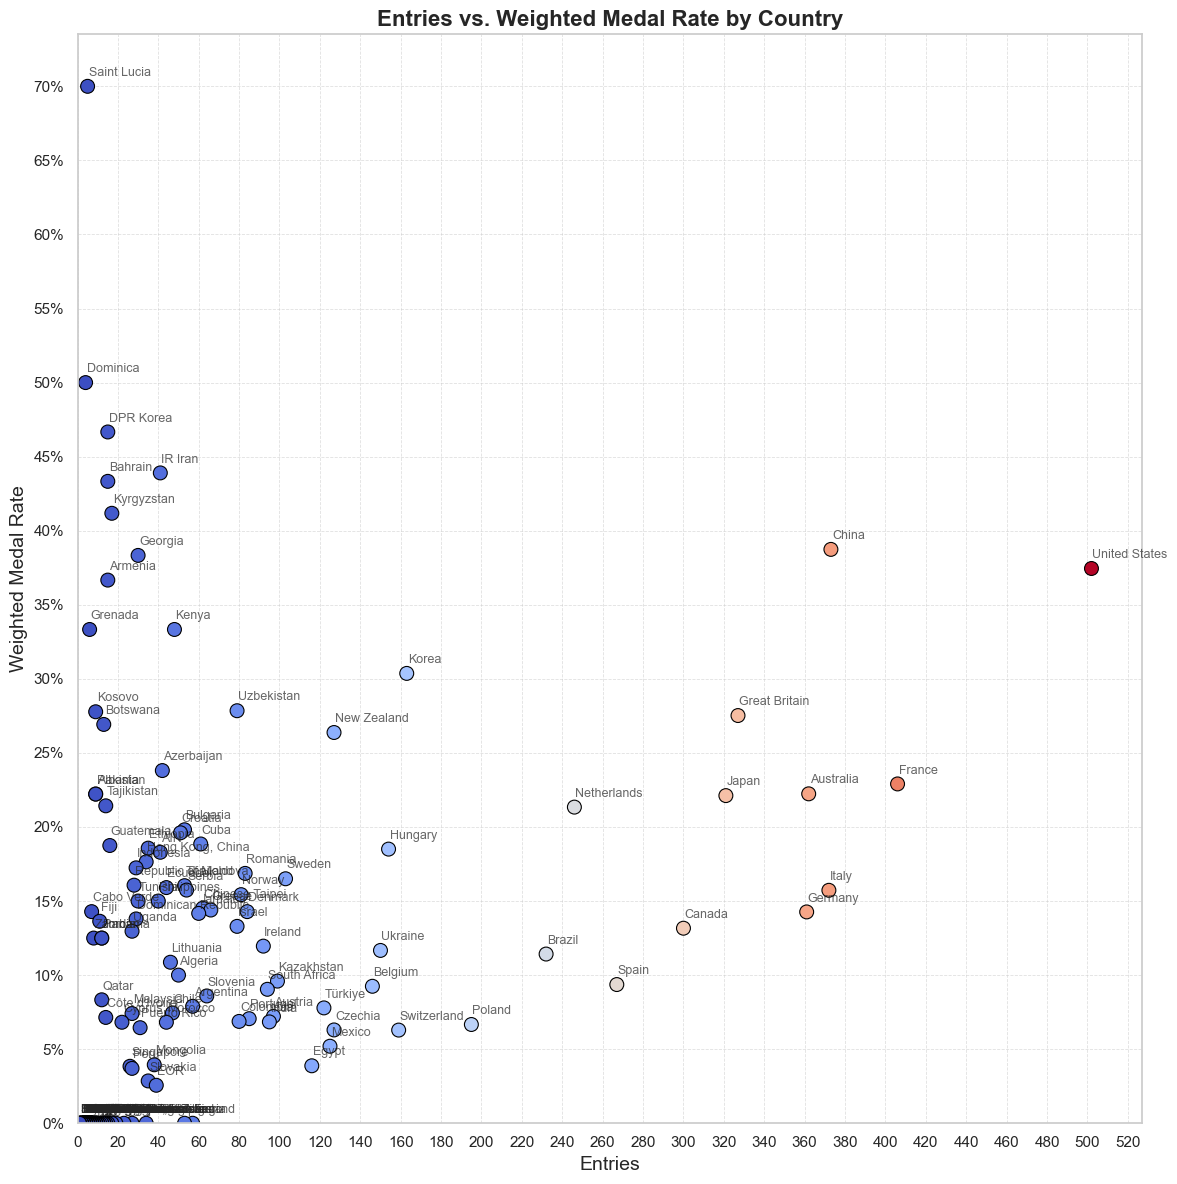

In [24]:
# Copy data
data = country_df.copy()

# Multiply 'medal_rate_weighted' by 100 for percentage display
data['medal_rate_weighted_percentage'] = data['medal_rate_weighted'] * 100

# Set up Seaborn's style and a color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)  # Use a colormap that spans a spectrum

# Create the plot
plt.figure(figsize=(12, 12))

# Scatter plot with varied colors using 'entries' to define the color spectrum
scatter_plot = sns.scatterplot(x='entries', y='medal_rate_weighted_percentage', data=data, 
                               hue='entries', palette=palette, s=100, edgecolor='black', legend=None)

# Add titles and labels
plt.title('Entries vs. Weighted Medal Rate by Country', fontsize=16, weight='bold')
plt.xlabel('Entries', fontsize=14)
plt.ylabel('Weighted Medal Rate', fontsize=14)

# Format the y-axis to show percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Set x and y axis limits to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Label each point with the country name, with more spacing from the points
for i in range(data.shape[0]):
    plt.text(data['entries'][i] + 0.5, data['medal_rate_weighted_percentage'][i] + 0.7, 
             data['country'][i], fontsize=9, alpha=0.7)

# Set major ticks for both axes
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))   # Major ticks every 5 entries
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))  # Major ticks every 10%

# Enable gridlines for major ticks only
plt.grid(True, which='major', linestyle='--', linewidth=0.6, alpha=0.6)

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()


***
***
## 3. Other analysis

In [10]:
country_df[["entries", "total_medals"]].corr()


,entries,total_medals
entries,1.00000,0.89764
total_medals,0.89764,1.00000


In [11]:
country_df[["entries", "medal_rate_unweighted", "medal_rate_weighted"]].corr()


,entries,medal_rate_unweighted,medal_rate_weighted
entries,1.000000,0.372375,0.392037
medal_rate_unweighted,0.372375,1.000000,0.976465
medal_rate_weighted,0.392037,0.976465,1.000000
